In [1]:
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\loren\Documents\GitHub\intro2ml_2021_final_project\Data\dataset_2k.csv')
print(df)

                       id language  retweet        date      time  \
0     1485744412172950000       en    False  24/01/2022  23:40:46   
1     1485721208616270000       en    False  24/01/2022  22:08:34   
2     1485712796457340000       en    False  24/01/2022  21:35:08   
3     1485696815081160000       en    False  24/01/2022  20:31:38   
4     1485676215142920000       en    False  24/01/2022  19:09:46   
...                   ...      ...      ...         ...       ...   
1995   576616860638158000       en    False  14/03/2015  06:32:27   
1996   576378534635155000       en    False  13/03/2015  14:45:25   
1997   576323800913997000       en    False  13/03/2015  11:07:56   
1998   576027220013031000       en    False  12/03/2015  15:29:25   
1999   576003023455068000       en    False  12/03/2015  13:53:17   

                                                  tweet  \
0     just sliced an acorn squash and it wasnt even ...   
1     Acorn squash, lacinato kale, parsnip and duck .

In [2]:
texts = df["tweet"]
lunghezze = [0 for x in texts]
for i in range(len(texts)):
    lunghezze[i]=len(texts[i])

In [3]:
rt = df["retweets_count"]
retweets = [np.int64(0) for x in rt]
for i in range(len(rt)):
    retweets[i] = rt[i]

In [4]:
popular = np.zeros((len(lunghezze),1),dtype=np.int32)
for i in range(len(lunghezze)):
    if retweets[i]>=1000:
        popular[i]=1
print(popular)
type(popular)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


numpy.ndarray

In [5]:
photos = df["photos"]
numphoto = np.zeros((len(photos),1),dtype=np.int32)
for i in range(len(photos)):
    if(photos[i]!=photos[0]):
        numphoto[i]=len(photos[i].split(','))

In [6]:
ht = df["hashtags"]
nhash = np.zeros((len(ht),1),dtype=np.int32)
for i in range(len(ht)):
    if(ht[i]!=ht[0]):
        nhash[i]=len(ht[i].split(','))
print(nhash)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [7]:
vt = df["video"]
nvideo = np.zeros((len(vt),1),dtype=np.int32)
for i in range(len(vt)):
    if(vt[i]!=ht[0]):
        nvideo[i]=vt[i]
print(nvideo)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [9]:
sf = pd.read_csv(r'C:\Users\loren\Documents\GitHub\intro2ml_2021_final_project\Data\sentiment_by_sentence.csv')
print(sf)

      Unnamed: 0  anger  anticipation  disgust  fear  joy  sadness  surprise  \
0              1      0             2        0     0    0        0         0   
1              2      0             0        0     0    0        0         0   
2              3      0             2        0     0    3        0         2   
3              4      0             0        0     0    0        0         0   
4              5      0             0        0     0    0        0         0   
...          ...    ...           ...      ...   ...  ...      ...       ...   
1995        1996      0             0        0     0    0        0         0   
1996        1997      1             0        1     1    1        1         1   
1997        1998      0             0        0     0    1        0         0   
1998        1999      0             1        0     1    1        0         1   
1999        2000      0             0        0     0    0        0         0   

      trust  negative  positive  
0    

In [10]:
X = np.zeros((len(lunghezze),14),dtype=np.int32)
for i in range(len(lunghezze)):
    X[i][0]=lunghezze[i]
    X[i][1]=nhash[i]
    X[i][2]=numphoto[i]
    X[i][3]=nvideo[i]
    X[i][4]=sf["anger"][i]
    X[i][5]=sf["anticipation"][i]
    X[i][6]=sf["disgust"][i]
    X[i][7]=sf["fear"][i]
    X[i][8]=sf["joy"][i]
    X[i][9]=sf["sadness"][i]
    X[i][10]=sf["surprise"][i]
    X[i][11]=sf["trust"][i]
    X[i][12]=sf["negative"][i]
    X[i][13]=sf["positive"][i]
print(X)

[[ 85   0   0 ...   0   0   0]
 [160   0   0 ...   0   0   0]
 [126   0   0 ...   2   0   3]
 ...
 [ 27   0   0 ...   1   0   2]
 [ 29   0   0 ...   1   0   1]
 [ 57   0   1 ...   0   0   0]]


######################################################################################################################################
######################################################################################################################################
######################################################################################################################################

PROVA DELLA FUNZIONE CHE DIVIDE IN TEST E TRAIN PER UTILIZZARLA A RIPETIZIONE POI

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
y=popular.ravel()
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [17]:
regr = RandomForestClassifier(n_estimators=250,max_depth=20, random_state=0)
regr.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, n_estimators=250, random_state=0)

In [19]:
predpoints = np.zeros((len(X_test),1),dtype=np.int32)
for i in range(len(X_test)):
    predpoints[i] = regr.predict([[X_test[i][0],X_test[i][1],X_test[i][2],X_test[i][3],X_test[i][4],X_test[i][5],X_test[i][6],X_test[i][7],X_test[i][8],X_test[i][9],X_test[i][10],X_test[i][11],X_test[i][12],X_test[i][13]]])[0]

In [24]:
def errs():
    npop=0
    for i in range(len(Y_test)):
        if(Y_test[i]==1):
            npop+=1
    errori = np.zeros((len(X_test),1),dtype=np.int32)
    count=0
    for i in range(len(X_test)):
        errori[i]=abs(Y_test[i]-predpoints[i])
        if(errori[i]==1):
            count+=1 
    mpl.scatter(X_test[:,0],errori)
    print(errori[0])
    print(count)
    print(count/len(X_test))
    erroripop = np.zeros((len(X_test),1),dtype=np.int32)
    count=0
    for i in range(len(X_test)):
        if(Y_test[i]==1):
            erroripop[i]=abs(Y_test[i]-predpoints[i])+1
            if(erroripop[i]==2):
                count+=1
    print(erroripop[0])
    print(count)
    print(count/npop)
    mpl.scatter(X_test[:,0],erroripop)
    errorinpop = np.zeros((len(X_test),1),dtype=np.int32)
    count=0
    for i in range(len(X_test)):
        if(Y_test[i]==0):
            errorinpop[i]=abs(Y_test[i]-predpoints[i])+1
            if(errorinpop[i]==2):
                count+=1
    print(errorinpop[0])
    print(count)
    print(count/(len(Y_test)-npop))
    mpl.scatter(X_test[:,0],errorinpop)

[0]
166
0.332
[1]
78
0.32098765432098764
[0]
88
0.3424124513618677


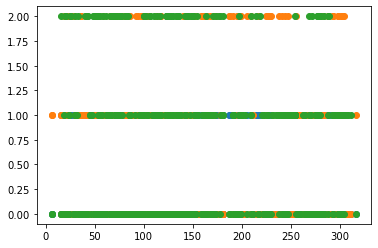

In [25]:
errs()

##########################################################################################################################################

PROVA RANDOM. NON E' UNA CROSSVALIDATION VERA E PROPRIA MA SI ITERA PIU' E PIU' VOLTE LA DIVISIONE PER VEDERE L'ERRORE MEDIO SUL CAMPIONE DI TEST

In [32]:
N=100
err=np.zeros((N,3))
regr = RandomForestClassifier(n_estimators=250,max_depth=20, random_state=0)

In [33]:
def errs(m):
    npop=0
    for i in range(len(Y_test)):
        if(Y_test[i]==1):
            npop+=1
    errori = np.zeros((len(X_test),1),dtype=np.int32)
    count=0
    for i in range(len(X_test)):
        errori[i]=abs(Y_test[i]-predpoints[i])
        if(errori[i]==1):
            count+=1 
    err[m][0]=count/len(X_test)
    erroripop = np.zeros((len(X_test),1),dtype=np.int32)
    count=0
    for i in range(len(X_test)):
        if(Y_test[i]==1):
            erroripop[i]=abs(Y_test[i]-predpoints[i])+1
            if(erroripop[i]==2):
                count+=1
    err[m][1]=count/npop
    errorinpop = np.zeros((len(X_test),1),dtype=np.int32)
    count=0
    for i in range(len(X_test)):
        if(Y_test[i]==0):
            errorinpop[i]=abs(Y_test[i]-predpoints[i])+1
            if(errorinpop[i]==2):
                count+=1
    err[m][2]=count/(len(Y_test)-npop)

In [46]:
for j in range(N):
    X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.1, random_state=j)
    regr.fit(X_train,Y_train)
    predpoints = np.zeros((len(X_test),1),dtype=np.int32)
    for i in range(len(X_test)):
        predpoints[i] = regr.predict([[X_test[i][0],X_test[i][1],X_test[i][2],X_test[i][3],X_test[i][4],X_test[i][5],X_test[i][6],X_test[i][7],X_test[i][8],X_test[i][9],X_test[i][10],X_test[i][11],X_test[i][12],X_test[i][13]]])[0]
    errs(j)

In [47]:
print(err)

[[0.325      0.31683168 0.33333333]
 [0.455      0.49019608 0.41836735]
 [0.375      0.41818182 0.32222222]
 [0.295      0.27722772 0.31313131]
 [0.38       0.37894737 0.38095238]
 [0.34       0.37234043 0.31132075]
 [0.34       0.38888889 0.2826087 ]
 [0.4        0.42307692 0.375     ]
 [0.32       0.35714286 0.28431373]
 [0.345      0.37373737 0.31683168]
 [0.395      0.39805825 0.39175258]
 [0.325      0.34       0.31      ]
 [0.33       0.33684211 0.32380952]
 [0.39       0.38043478 0.39814815]
 [0.36       0.38834951 0.32989691]
 [0.37       0.44660194 0.28865979]
 [0.34       0.36734694 0.31372549]
 [0.405      0.42857143 0.38235294]
 [0.365      0.4040404  0.32673267]
 [0.395      0.42156863 0.36734694]
 [0.305      0.35789474 0.25714286]
 [0.37       0.34343434 0.3960396 ]
 [0.325      0.37113402 0.2815534 ]
 [0.38       0.36470588 0.39130435]
 [0.36       0.37142857 0.34736842]
 [0.305      0.36190476 0.24210526]
 [0.365      0.34       0.39      ]
 [0.365      0.43023256 0.31

In [48]:
import statistics as sts

In [49]:
print(sts.mean(err[:,0]))
print(sts.mean(err[:,1]))
print(sts.mean(err[:,2]))

0.35075
0.3729230272966097
0.32841038009918594


###############################################################################################################################################

PROVIAMO AD UTILIZZARE ORA UNA CV-SCORE PER STIMARE L'ACCURACY

In [50]:
from sklearn.model_selection import cross_val_score

In [59]:
scores = cross_val_score(regr, X, y, cv=100)

In [60]:
scores

array([0.6 , 0.5 , 0.6 , 0.6 , 0.55, 0.25, 0.5 , 0.5 , 0.4 , 0.6 , 0.45,
       0.7 , 0.5 , 0.4 , 0.8 , 0.7 , 0.7 , 0.75, 0.4 , 0.55, 0.7 , 0.6 ,
       0.7 , 0.6 , 0.65, 0.65, 0.75, 0.55, 0.7 , 0.85, 0.6 , 0.8 , 0.65,
       0.6 , 0.65, 0.75, 0.7 , 0.6 , 0.8 , 0.65, 0.55, 0.5 , 0.75, 0.75,
       0.75, 0.7 , 0.65, 0.75, 0.65, 0.85, 0.6 , 0.65, 0.95, 0.65, 0.7 ,
       0.65, 0.5 , 0.6 , 0.6 , 0.85, 0.65, 0.6 , 0.6 , 0.85, 0.5 , 0.85,
       0.7 , 0.7 , 0.65, 0.7 , 0.9 , 0.7 , 0.9 , 0.6 , 0.85, 0.8 , 0.65,
       0.9 , 0.6 , 0.85, 0.75, 0.65, 0.4 , 0.7 , 0.45, 0.8 , 0.65, 0.5 ,
       0.6 , 0.75, 0.6 , 0.6 , 0.55, 0.55, 0.7 , 0.65, 0.55, 0.65, 0.5 ,
       0.7 ])

In [61]:
print(scores.mean())
print(scores.std())

0.6510000000000001
0.1268818347912734


SI NOTI COME OUT-OF-SAMPLE IL MECCANISMO DI PREVISIONE RISULTA ESSERE SENSIBILMENTE PEGGIORE CHE IN SAMPLE CON UNA MEDIA DELL'ACCURACY INTORNO AL 65% CHE E' POCO MENO DI DUE VOLTE SU TRE. ALTRIMENTI DETTO QUESTO E' POCO MENO EQUIVALENTE A TIRARE UN DADO E DIRE CHE E' POPOLARE SE FA 5 O 6. E' DUNQUE INTERESSANTE VEDERE SE LE COSE CAMBIANO CON UN CAMPIONE PIU' GRANDE

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

In [1]:
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\loren\Documents\GitHub\intro2ml_2021_final_project\Data\2k_sample_processed.csv')
print(df)

       weekday  hour  tweet_length  mentions_count  urls_count  photos_count  \
0       Monday    23            85               2           2             2   
1       Monday    22           160             156          63             2   
2       Monday    21           126               2           2             2   
3       Monday    20            47               2           2             2   
4       Monday    19            30               2           2             2   
...        ...   ...           ...             ...         ...           ...   
1995  Saturday     6            55               2           2            51   
1996    Friday    14           140               2           2             2   
1997    Friday    11            27               2           2             2   
1998  Thursday    15            29               2           2             2   
1999  Thursday    13            57               2           2            51   

      hashtags_count  quote_url_count  

In [2]:
y = df["retweets_count"]

In [3]:
def switch(day):
    if(day=="Monday"):
        return 1
    if(day=="Tuesday"):
        return 2
    if(day=="Wednesday"):
        return 3
    if(day=="Thursday"):
        return 4
    if(day=="Friday"):
        return 5
    if(day=="Saturday"):
        return 6
    if(day=="Sunday"):
        return 7
    else:
        print("ERRORE")

In [4]:
days=np.zeros((len(y),1),dtype=np.int32)
for i in range(len(days)):
    days[i]=switch(df["weekday"][i])

In [5]:
X=np.zeros((len(y),18),dtype=np.int32)
for i in range(len(X)):
    X[i][0]=df["tweet_length"][i]
    X[i][1]=df["hour"][i]
    X[i][2]=days[i]
    X[i][3]=df["mentions_count"][i]
    X[i][4]=df["urls_count"][i]
    X[i][5]=df["photos_count"][i]
    X[i][6]=df["hashtags_count"][i]
    X[i][7]=df["video_count"][i]
    X[i][8]=df["anger"][i]
    X[i][9]=df["anticipation"][i]
    X[i][10]=df["disgust"][i]
    X[i][11]=df["fear"][i]
    X[i][12]=df["joy"][i]
    X[i][13]=df["sadness"][i]
    X[i][14]=df["surprise"][i]
    X[i][15]=df["trust"][i]
    X[i][16]=df["positive"][i]
    X[i][17]=df["negative"][i]

In [7]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(n_estimators=250,max_depth=20, random_state=0)

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
scores = cross_val_score(regr, X, y, cv=100)

In [10]:
print(scores.mean())
print(scores.std())

0.7075
0.16528384676065594
